# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: João Victor Alcoforado de Araújo, Lívia Noêmia Morais Rocha e Matheus Rocha dos Santos Rangel.

## **Projeto #2 - Exploração Inicial**

Abaixo foram feitas explorações iniciais nos dois datasets excolhidos pelo grupo:  
1. Campanha Nacional de Vacinação contra Covid-19 [(CNVCC)](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao)  
2. Banco de Dados de Síndrome Respiratória Aguda Grave [(SRAG)](https://opendatasus.saude.gov.br/dataset/bd-srag-2021).


#### **Imports e configurações gerais**

In [1]:
#Dependencias
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Configurações DataFrame
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)

In [3]:
#Acesso a arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploração Inicial - CNVCC**

[Dicionário de dados do dataset](https://opendatasus.saude.gov.br/dataset/b772ee55-07cd-44d8-958f-b12edd004e0b/resource/38ead83d-b115-4219-852e-7244792bc311/download/dicionario-de-dados-vacinacao.pdf)

In [4]:
cnvcc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICD/Datasets/CNVCC - Nordeste1.csv')

In [5]:
cnvcc.head()

,document_id,paciente_id,paciente_idade,paciente_enumSexoBiologico,estabelecimento_uf,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,ddc87995-000b-47a1-b90e-6b0d0563f978-i0b0,6b16f0c5e10a74e22ad7f043d723f475cf6b1f349db2d159965d2b76eee68964,23.0,F,MA,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-04-30T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
1,7b8f308b-b027-4e31-a6c9-1352df60e0c0-i0b0,d7390505c9f33725adf5af0de73e5924bdd4db1154b3ad9960902207e71dacee,73.0,F,MA,Faixa Etária,FUNDACAO BUTANTAN,2021-03-11T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,a9410084-eadf-449e-9d8c-fb6cb7f8a719-i0b0,3aec5e352cba8ad396136966088797ec45e9b29aebd136bb744164da0bffa571,61.0,F,MA,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-04-29T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
3,45373304-db08-47c9-9174-9cc2a53110b4-i0b0,fafb9a784ebdf54d418b37c1b0e0260cf371c16ead72c6cbafff9fd8c196a00e,23.0,F,MA,Povos Indígenas,FUNDACAO BUTANTAN,2021-03-12T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,e8b44e85-890d-4e5f-a286-6d1f1b26fba7-i0b0,1b518f76d0415ffdb07e65f875db7f6a8a6ec741748375818a635a4182463620,70.0,F,MA,Faixa Etária,FUNDACAO BUTANTAN,2021-04-29T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan


#### **Análise de valores nulos**

In [6]:
cnvcc.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718209 entries, 0 to 11718208
Data columns (total 10 columns):
 #   Column                      Non-Null Count     Dtype  
---  ------                      --------------     -----  
 0   document_id                 11718209 non-null  object 
 1   paciente_id                 11718208 non-null  object 
 2   paciente_idade              11718208 non-null  float64
 3   paciente_enumSexoBiologico  11718208 non-null  object 
 4   estabelecimento_uf          11718209 non-null  object 
 5   vacina_categoria_nome       11659896 non-null  object 
 6   vacina_fabricante_nome      10913412 non-null  object 
 7   vacina_dataAplicacao        11718209 non-null  object 
 8   vacina_descricao_dose       11718209 non-null  object 
 9   vacina_nome                 11718209 non-null  object 
dtypes: float64(1), object(9)
memory usage: 894.0+ MB


#### **Centralidade, dispersão e boxplot da Idade**

In [7]:
cnvcc['paciente_idade'].describe()

count    1.171821e+07
mean     6.438279e+01
std      1.694318e+01
min      0.000000e+00
25%      6.000000e+01
50%      6.800000e+01
75%      7.500000e+01
max      2.210000e+02
Name: paciente_idade, dtype: float64

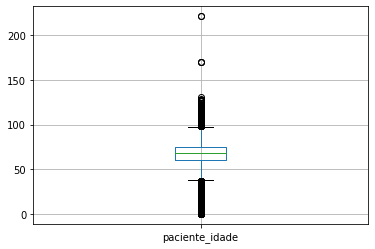

In [8]:
cnvcc.boxplot('paciente_idade')

#### **Frequência de pessoas por quantidade de doses**

In [9]:
cnvcc.groupby('paciente_id').size().value_counts(dropna=False)

1     4253365
2     3438453
3      113113
4       60974
5         659
6         203
8           9
7           5
82          1
dtype: int64

#### **Frequência de pessoas por sexo biológico**

In [10]:
cnvcc['paciente_enumSexoBiologico'].value_counts(dropna=False)

F      6867384
M      4850812
I           12
NaN          1
Name: paciente_enumSexoBiologico, dtype: int64

#### **Frequência de pessoas por categoria de vacinação**

In [11]:
cnvcc['vacina_categoria_nome'].value_counts(sort=True, ascending=False, dropna=False)

Faixa Etária                                       8072604
Trabalhadores de Saúde                             2670533
Povos e Comunidades Tradicionais                    248448
Pessoas de 60 anos ou mais institucionalizadas      185409
Povos Indígenas                                     166670
Comorbidades                                        142589
Trabalhadores da Educação                            89650
Forças de Segurança e Salvamento                     64255
NaN                                                  58313
Pessoas com Deficiência                              10348
Funcionário do Sistema de Privação de Liberdade       6076
Forças Armadas (membros ativos)                       2207
Pessoas em Situação de Rua                             468
Trabalhadores Portuários                               245
População Privada de Liberdade                         212
Trabalhadores Industriais                              182
Name: vacina_categoria_nome, dtype: int64

#### **Frequência de pessoas por fabricante de vacina**

In [12]:
cnvcc['vacina_nome'].value_counts(sort=True, ascending=False, dropna=False)

Covid-19-Coronavac-Sinovac/Butantan                          8554118
Vacina Covid-19 - Covishield                                 2895933
Covid-19-AstraZeneca                                          265506
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer       2601
Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag                     51
Name: vacina_nome, dtype: int64

#### **Frequência de vacinados por estado**

In [13]:
cnvcc['estabelecimento_uf'].value_counts(sort=True, ascending=False, dropna=False)

BA    3317424
PE    1932509
CE    1527874
MA    1343029
PB     993899
RN     785477
AL     679712
PI     644210
SE     494075
Name: estabelecimento_uf, dtype: int64

## **Exploração Inicial - SRAG**

[Dicionário de dados do dataset](https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/b3321e55-24e9-49ab-8651-29cf5c8f3179/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf)

In [14]:
srag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICD/Datasets/SRAG - 2021.csv')

In [15]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_ESCOL_N,SG_UF,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,05/01/2021,1,05/01/2021,F,51,3,6,2.0,RJ,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,05/01/2021,1.0,05/01/2021,NaN,1.0,5.0,2.0,21/01/2021,NaN,1.0,NaN,NaN
1,06/01/2021,1,03/01/2021,F,80,3,5,NaN,PE,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,S,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,05/01/2021,2.0,NaN,NaN,2.0,5.0,2.0,13/01/2021,NaN,NaN,NaN,NaN
2,07/01/2021,1,04/01/2021,M,40,3,6,3.0,MT,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2021,1,03/01/2021,M,15,3,6,3.0,SP,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,06/01/2021,2.0,NaN,NaN,3.0,4.0,NaN,NaN,2.0,2.0,2.0,2.0
4,08/01/2021,1,04/01/2021,F,1,3,6,5.0,PB,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,08/01/2021,2.0,NaN,NaN,3.0,5.0,1.0,10/01/2021,2.0,2.0,2.0,2.0


#### **Análise de valores nulos do dataset**

In [16]:
srag.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597113 entries, 0 to 597112
Data columns (total 44 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  597113 non-null  object 
 1   SEM_NOT     597113 non-null  int64  
 2   DT_SIN_PRI  597113 non-null  object 
 3   CS_SEXO     597113 non-null  object 
 4   NU_IDADE_N  597113 non-null  int64  
 5   TP_IDADE    597113 non-null  int64  
 6   CS_GESTANT  597113 non-null  int64  
 7   CS_ESCOL_N  393198 non-null  float64
 8   SG_UF       597039 non-null  object 
 9   SURTO_SG    187973 non-null  float64
 10  FEBRE       497566 non-null  float64
 11  TOSSE       515633 non-null  float64
 12  GARGANTA    418937 non-null  float64
 13  DISPNEIA    525576 non-null  float64
 14  DESC_RESP   486096 non-null  float64
 15  SATURACAO   505239 non-null  float64
 16  DIARREIA    414343 non-null  float64
 17  VOMITO      406509 non-null  float64
 18  PUERPERA    217337 non-null  float64
 19  FA

#### **Centralidade, dispersão e boxplot da Idade**

In [17]:
srag['NU_IDADE_N'].describe()

count    597113.000000
mean         56.778002
std          20.212005
min         -77.000000
25%          45.000000
50%          59.000000
75%          71.000000
max         136.000000
Name: NU_IDADE_N, dtype: float64

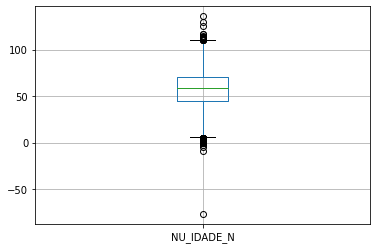

In [18]:
srag.boxplot("NU_IDADE_N")

#### **Análise de validade dos anos das datas registradas**

In [19]:
colunas_datatime = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

for column in colunas_datatime:
    print(column, srag[column].str[6:10].unique())

DT_NOTIFIC ['2021']
DT_SIN_PRI ['2021']
DT_INTERNA ['2021' nan '2020' '2202' '2024' '2121' '5202' '2025' '3021' '7202' '3202'
 '2022' '2012' '4202' '2019' '2023']
DT_ENTUTI ['2021' nan '2020' '2202' '2022' '2121' '4202' '2023' '7202' '2019' '2024']
DT_SAIDUTI [nan '2021' '2020']
DT_EVOLUCA ['2021' nan]


#### **Transformação de dados para análise dos tempos de internação e UTI**

In [20]:
#Conversao para datetime
colunas_datatime = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

for coluna in colunas_datatime:
    srag[coluna] = pd.to_datetime(srag[coluna], errors="coerce", dayfirst=True)

In [21]:
#Criacao das colunas tempo de internação e UTI
srag["TEMPO_INTER"] = ((srag["DT_EVOLUCA"] - srag["DT_INTERNA"]).dt.days).astype("Int64")
srag["TEMPO_UTI"] = ((srag["DT_SAIDUTI"] - srag["DT_ENTUTI"]).dt.days).astype("Int64")

In [22]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_ESCOL_N,SG_UF,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TEMPO_INTER,TEMPO_UTI
0,2021-01-05,1,2021-01-05,F,51,3,6,2.0,RJ,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-05,1.0,2021-01-05,NaT,1.0,5.0,2.0,2021-01-21,NaN,1.0,NaN,NaN,16,<NA>
1,2021-01-06,1,2021-01-03,F,80,3,5,NaN,PE,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,S,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2021-01-05,2.0,NaT,NaT,2.0,5.0,2.0,2021-01-13,NaN,NaN,NaN,NaN,8,<NA>
2,2021-01-07,1,2021-01-04,M,40,3,6,3.0,MT,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,NaN,NaT,NaT,3.0,5.0,NaN,NaT,NaN,NaN,NaN,NaN,<NA>,<NA>
3,2021-01-07,1,2021-01-03,M,15,3,6,3.0,SP,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2021-01-06,2.0,NaT,NaT,3.0,4.0,NaN,NaT,2.0,2.0,2.0,2.0,<NA>,<NA>
4,2021-01-08,1,2021-01-04,F,1,3,6,5.0,PB,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-08,2.0,NaT,NaT,3.0,5.0,1.0,2021-01-10,2.0,2.0,2.0,2.0,2,<NA>


#### **Analise de valores nulos do tempo de internação e UTI**

In [23]:
srag[['TEMPO_INTER', 'TEMPO_UTI']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597113 entries, 0 to 597112
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   TEMPO_INTER  427340 non-null  Int64
 1   TEMPO_UTI    90142 non-null   Int64
dtypes: Int64(2)
memory usage: 10.3 MB


#### **Centralidade, dispersão e boxplot do tempo de internação**

In [24]:
srag["TEMPO_INTER"].describe()

count    427340.000000
mean          9.453295
std          10.395275
min           0.000000
25%           4.000000
50%           7.000000
75%          12.000000
max        3293.000000
Name: TEMPO_INTER, dtype: float64

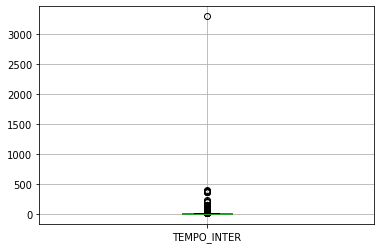

In [25]:
srag.boxplot("TEMPO_INTER")

#### **Centralidade, dispersão e boxplot do tempo de UTI**

In [26]:
srag["TEMPO_UTI"].describe()

count    90142.000000
mean         9.697688
std          9.065177
min          0.000000
25%          3.000000
50%          7.000000
75%         13.000000
max        287.000000
Name: TEMPO_UTI, dtype: float64

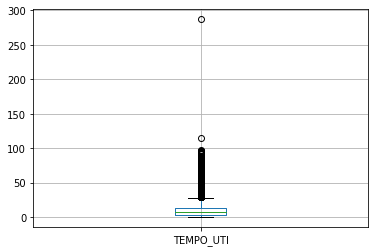

In [27]:
srag.boxplot("TEMPO_UTI")

#### **Análise dos valores únicos de cada atributo**

In [29]:
desconsiderar = set(colunas_datatime) | set(['NU_IDADE_N', 'SG_UF', 'TEMPO_INTER', 'TEMPO_UTI'])
for coluna in set(srag.columns) - desconsiderar:
    print(coluna, srag[coluna].unique())

FEBRE [ 1. nan  2.  9.]
SUPORT_VEN [ 1.  2.  3. nan  9.]
DIARREIA [nan  1.  2.  9.]
DESC_RESP [ 1. nan  2.  9.]
NEUROLOGIC [nan  1.  2.  9.]
ASMA [nan  2.  1.  9.]
PNEUMOPATI [nan  2.  1.  9.]
FADIGA [ 1. nan  2.  9.]
IMUNODEPRE [nan  1.  2.  9.]
EVOLUCAO [ 2. nan  1.  9.  3.]
RENAL [nan  2.  1.  9.]
SATURACAO [ 1. nan  2.  9.]
PERD_OLFT [nan  2.  9.  1.]
CS_ESCOL_N [ 2. nan  3.  5.  9.  4.  1.  0.]
CARDIOPATI [nan  1.  2.  9.]
DISPNEIA [ 1. nan  2.  9.]
SURTO_SG [ 2. nan  1.  9.]
SEM_NOT [ 1  2 15  3  4  5  6  7  8  9 10 11 14 12 13 16 17 18]
VOMITO [nan  1.  2.  9.]
HEMATOLOGI [nan  2.  1.  9.]
HOSPITAL [ 1.  2. nan  9.]
DOR_ABD [nan  2.  1.  9.]
PERD_PALA [nan  2.  9.  1.]
CS_SEXO ['F' 'M' 'I']
TOSSE [ 1.  2. nan  9.]
FATOR_RISC ['N' 'S']
PUERPERA [nan  2.  9.  1.]
CLASSI_FIN [5. 4. 2. 1. 3.]
OBESIDADE [nan  2.  1.  9.]
DIABETES [nan  2.  1.  9.]
TP_IDADE [3 2 1]
UTI [ 1.  2. nan  9.]
SIND_DOWN [nan  2.  9.  1.]
CS_GESTANT [6 5 9 3 4 2 1 0]
GARGANTA [nan  1.  2.  9.]
HEPATICA [nan  